In [51]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
%matplotlib inline

In [6]:
# read data from Salary.csv

data = pd.read_csv('./datasets/Salary.csv')

In [7]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [11]:
data.shape

(35, 2)

In [8]:
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


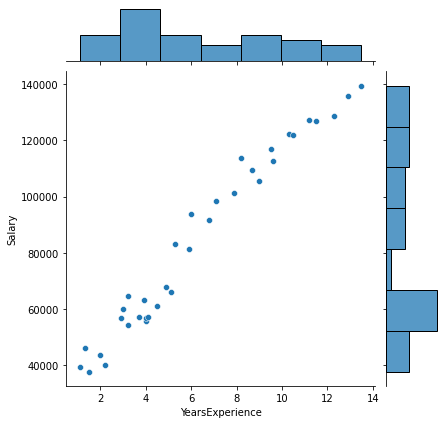

In [10]:
sns.jointplot(x='YearsExperience', y='Salary', data=data)

In [13]:
x = data['YearsExperience']
y = data['Salary']

In [126]:
#split into train and test data

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [36]:
# using sklearn LinearRegression
model1 = LinearRegression()
model1.fit(x_train, y_train)
print(model1.intercept_, model1.coef_)

[27576.59431014] [[9032.88660899]]


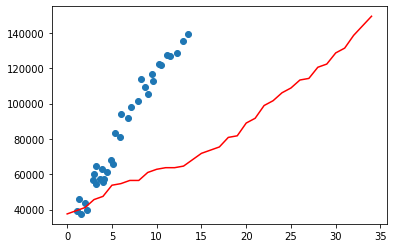

In [35]:
plt.scatter(x=x, y=y)
plt.plot((9032.88*x+27576.59), color='red')

In [50]:
y_pred = model1.predict(y_test)
mse = mean_squared_error(y_test, y_pred)
print(f"mse : {mse}")

mse : 9.768106442331447e+17


In [78]:
# using stochastic gradient descent
model2 = SGDRegressor()
model2.fit(x_train, y_train)

SGDRegressor()

In [79]:
print(model2.intercept_, model2.coef_)
model2.predict([[3.2]])

[22757.08094478] [9616.79642524]


array([53530.82950554])

In [95]:
# calculate model accuracy
y_pred2 = model2.predict(y_test)
mse = mean_squared_error(y_test, y_pred2)
print(mse)

1.1071810593209362e+18


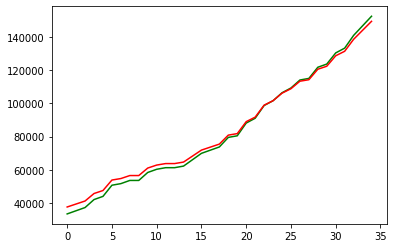

In [86]:
plt.plot((9616.79*x + 22757.09), color='green')
plt.plot((9032.88*x+27576.59), color='red')

In [110]:
# using numpy polyfit
m,c = np.polyfit(x_train, y_train, deg=1)
y = m * 3.2 + c
m, c

(9032.886608986004, 27576.594310144526)

In [107]:
def pred(m, c):
    l = []
    for val in x_test:
        l.append(m*val+c)
        #print(m*val+c)
    return np.array(l)

In [108]:
y_pred3 = pred(m, c)
y_pred3

array([[ 80870.62530316],
       [ 56481.8314589 ],
       [ 89000.22325125],
       [149520.56353146],
       [128744.92433079],
       [113389.01709551],
       [108872.57379102],
       [114292.30575641],
       [138681.09960067]])

In [109]:
# model accuracy
mse = mean_squared_error(y_test, y_pred3)
print(mse)

26631169.995374843


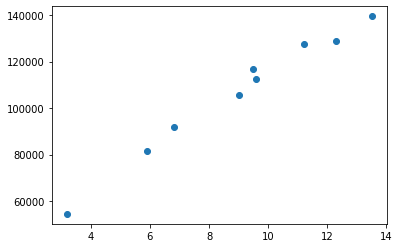

In [139]:
plt.scatter(x_test, y_test)

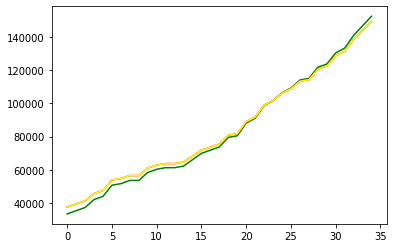

In [111]:
plt.plot((9616.79*x + 22757.09), color='green')
plt.plot((9032.88*x+27576.59), color='red')
plt.plot((9032.88*x+27576.59), color='yellow')

In [140]:
model3 = Ridge()
model3.fit(x_train, y_train)

Ridge()

In [142]:
model3.predict([[3.2]])
model3.intercept_, model3.coef_

(array([27754.00534426]), array([[8999.89170994]]))

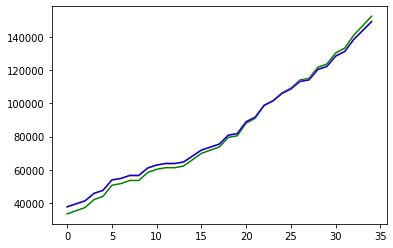

In [144]:
plt.plot((9616.79*x + 22757.09), color='green', label='SGDRegressor')
plt.plot((9032.88*x+27576.59), color='red', label='LinearRegression')
plt.plot((9032.88*x+27576.59), color='yellow', label='polyfit')
plt.plot((8999.89*x+27754.005), color='blue', label='Ridge')